# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Link: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data

**Extrovert vs. Introvert Behavior Data**


Dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
#Type your code here
df = pd.read_csv('personality_dataset.csv')

In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Dataset ini terdiri dari 8 kolom dengan 2900 baris. Terdapat 5 fitur dengan tipe data float dan 3 fitur dengan tipe data object. Beberapa fitur terindikasi missing value.

In [6]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

Dengan menggunakan fungsi .isna() kita bisa melihat bahwa hampir seluruh fitur memiliki missing value.

In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


Dari tabel tersebut kita bisa melihat bagaimana sebaran data.

In [8]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['number']).columns

In [29]:
categorical

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

Kita akan memisahkan data kategorikal dan data numerik untuk melakukan EDA.

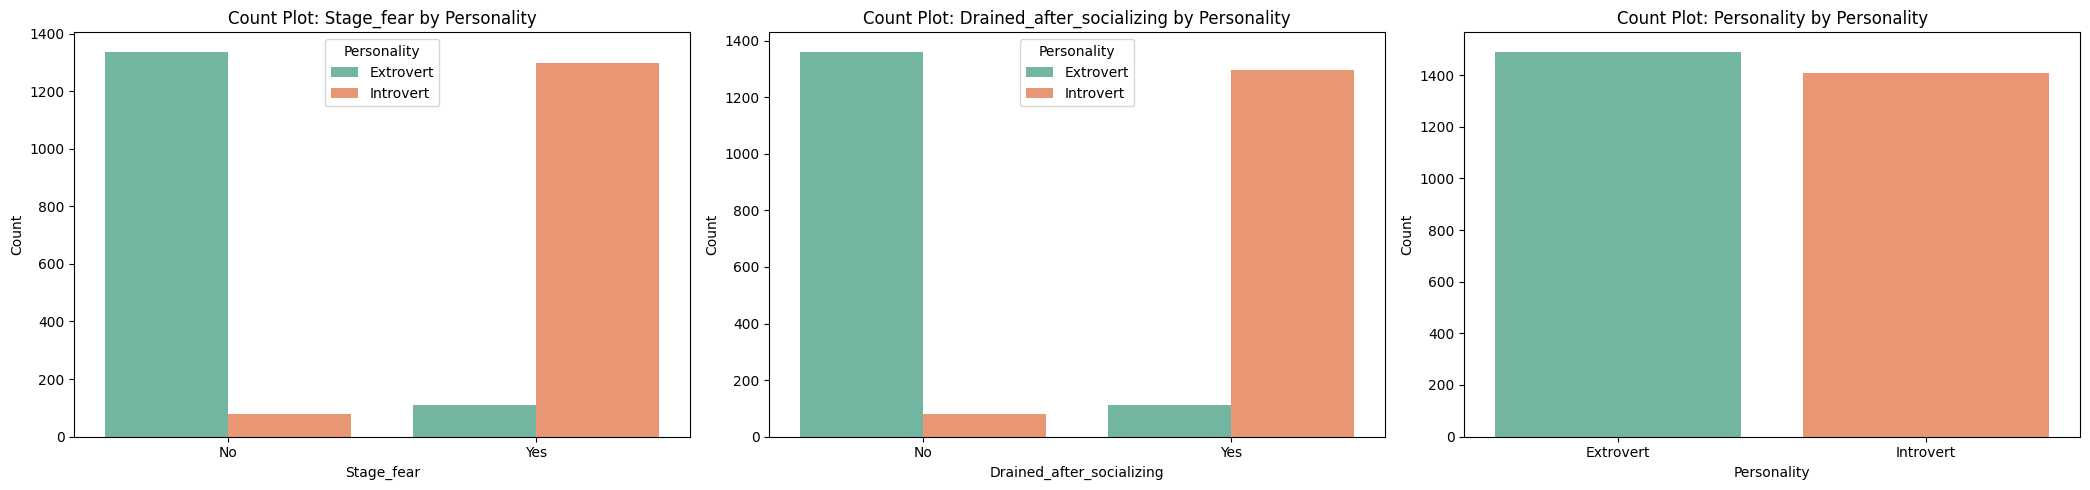

In [12]:
# Sebaran data kategorikal

# Menghitung banyaknya plot yang akan digunakan
num_plots = len(categorical)
# Menghitung jumlah kolom yang akan digunakan
num_cols = 3
# Menghitun jumlah baris yang akan digunakan
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*7, num_rows*5))

for i, col in enumerate(categorical):
  sns.countplot(x=col, hue='Personality', data=df, palette='Set2', ax=axes[i])
  axes[i].set_title(f"Count Plot: {col} by Personality")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()



* Stage_fear adalah fitur yang menyatakan adanya demam panggung. Dari plot tersebut dilihat, jika kebanyakan extrovert tidak merasakan demam panggung. Sebaliknya, introvert lebih banyak merasakan demam panggung dibandingkan dengan extrovert.

* Drained_after_socializing adalah parameter yang menentukan apakah seseorang merekasan kelelahan setelah bersosialisasi. Dari plot tersebut kebanyakan introvert mengalami hal ini daripada extrovert. Sementara kebanyakan extrovert tidak mengalami demam panggung.

* Personality adalah kategori apakah seseorang termasuk ke dalam kategori extrovert atau introvert. Pada grafik tersebut sebaran antara introvert dan extrovert jumlahnya tidak jauh berbeda. Hanya saya Extrovert lebih banyak sedikit daripada introvert.

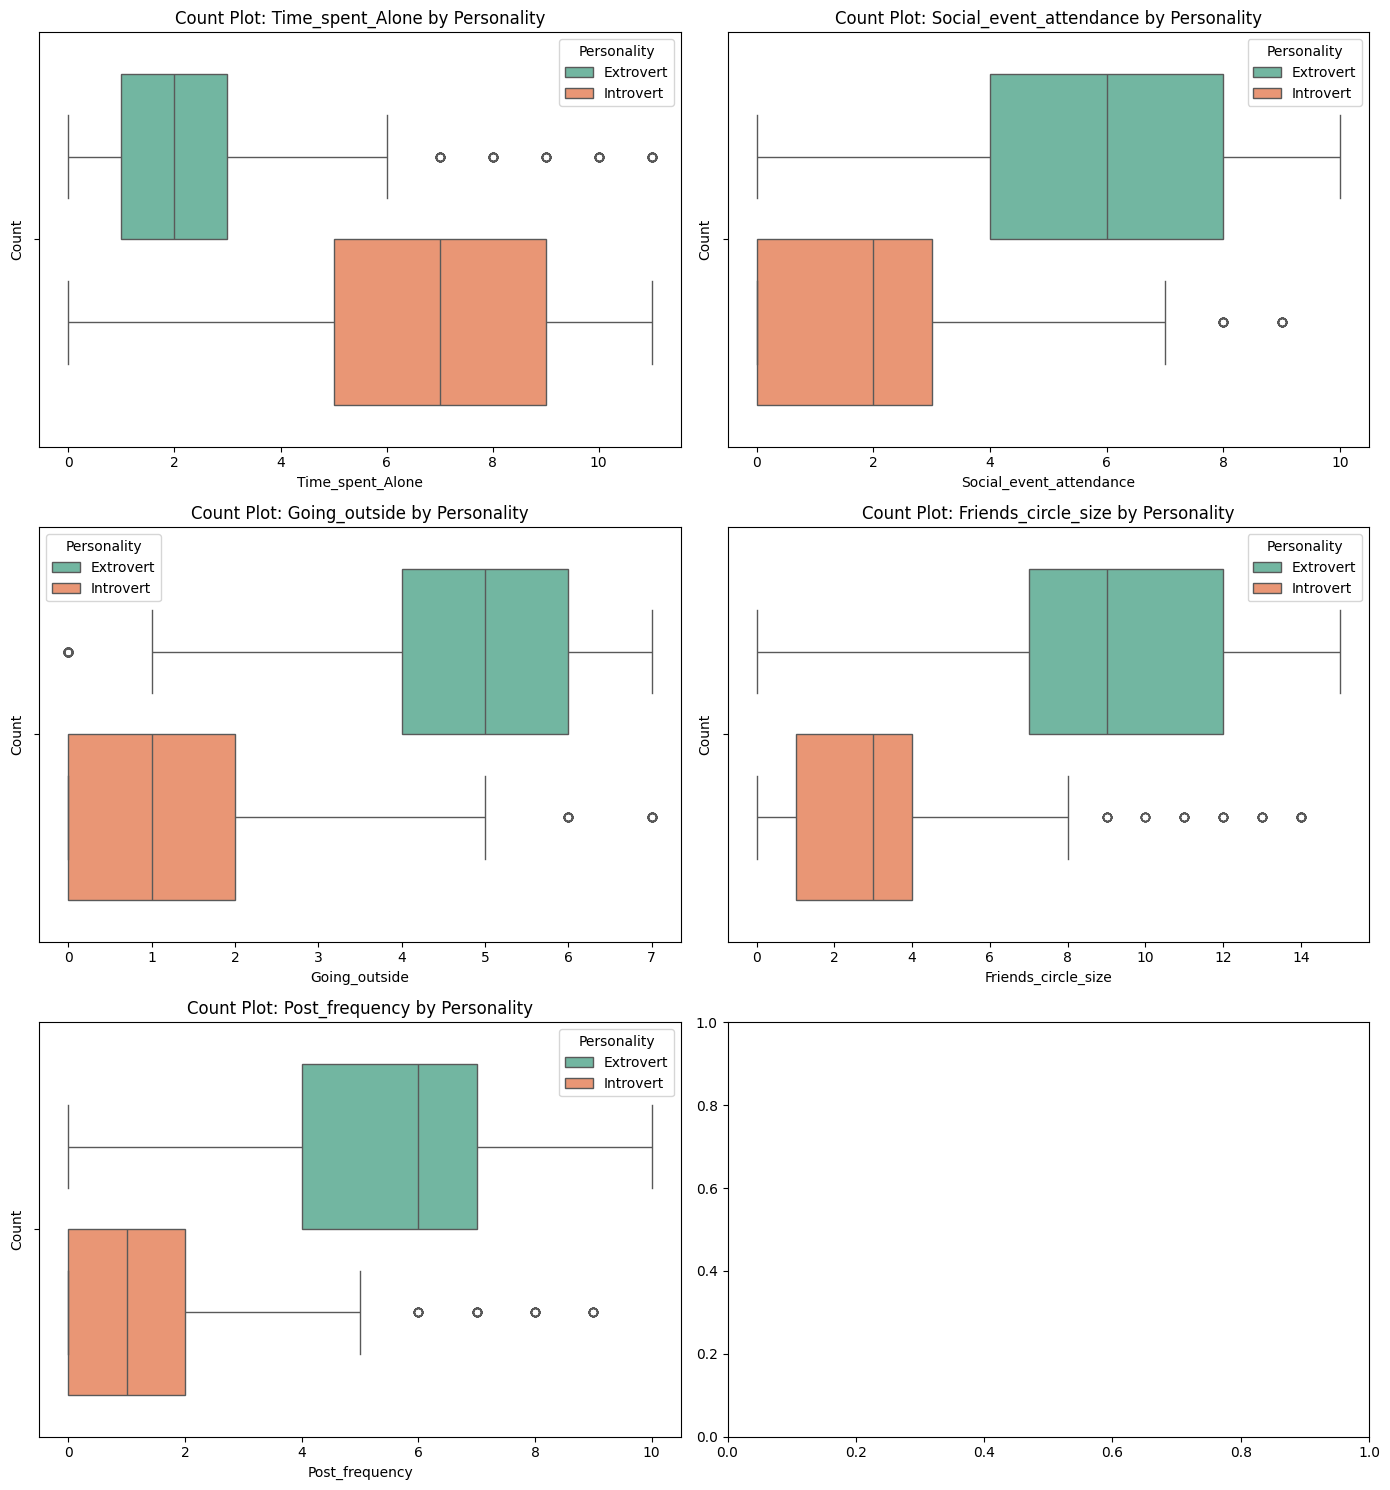

In [13]:
# Sebaran data numerik

# Menghitung banyaknya plot yang akan digunakan
num_plots = len(numerical)
# Menghitung jumlah kolom yang akan digunakan
num_cols = 2
# Menghitun jumlah baris yang akan digunakan
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*7, num_rows*5))

if num_rows == 1 and num_cols == 1:
  axes = np.array([axes])
elif num_rows == 1 or num_cols == 1:
  axes = axes.flatten()
else:
  axes = axes.flatten()

for i, col in enumerate(numerical):
  sns.boxplot(x=col, hue='Personality', data=df, palette='Set2', ax=axes[i])
  axes[i].set_title(f"Count Plot: {col} by Personality")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


# for col in numerical:
#   plt.figure(figsize=(8, 6))
#   sns.boxplot(x='Personality', y=col, data=df, palette='Set2')
#   plt.title(f"Box Plot: {col} by Personality")
#   plt.show()

Dari grafik keseluruhan dapat disimpulkan:
1. Introvert
Orang yang memiliki kepribadian introvert kebanyakan mengalami demam panggung, mengalami kelelahan setelah bersosialisasi, banyak menghabiskan waktu sendiri, jarang mengikuti acara sosial, memiliki frekuensi keluar rumah yang jarang, sedikit lingkaran pertemanan, dan jarang memposting sesuatu di sosial media mereka.

2. Extrovert
Orang yang memiliki kerpibadian extrovert sangat jarang yang mengalami demam panggung, rata-rata dari mereka hanya menghabiskan waktu 2 jam untuk menghabiskan waktu sendiri, mereka sering mengikuti kegiatan sosial, sering keluar rumah, memiliki banyak lingkaran pertemanan dan rata-rata postingan sosial media sebanyak 6

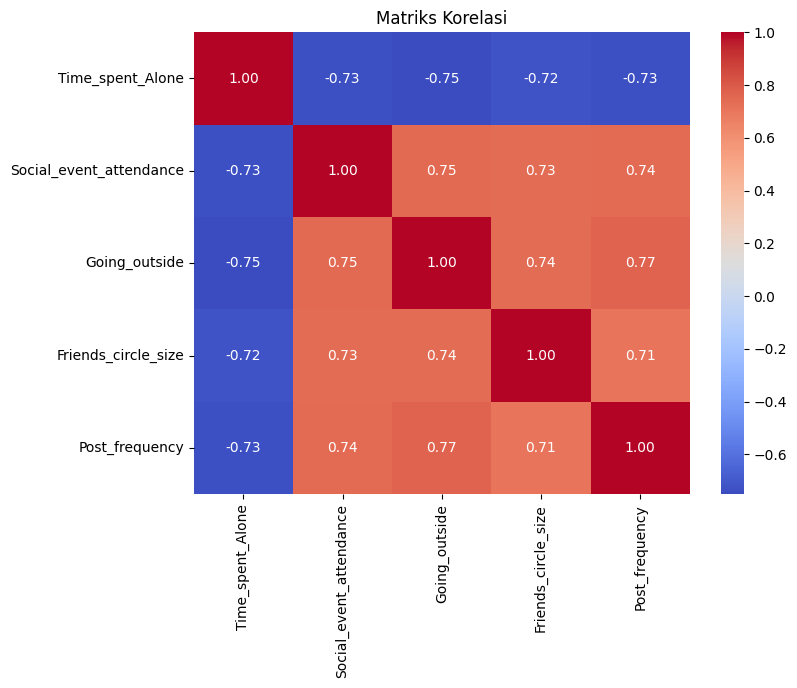

In [14]:
# Hitung korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

* Time_spent_Alone
  * Time_spent Alone vs Social_event_attendance, memiliki korelasi negatif yang kuat. Semakin banyak waktu yang dihabiskan sendirian, semakin rendah kemungkinan seseorang menghadiri acara sosial, dan sebaliknya.
  * Time_spent_Alone vs Going_outside, memiliki korelasi negatif yang sama seperti kegiatan sosial. Semakin banyak waktu yang dihabiskan sendirian, semakin kecil seseorang pergi keluar
  * with Friends_circle_size, orang yang banyak menghabiskan waktu sendiri cenderung memiliki lingakran pertemanan yang kecil.
  * woth Post_frequency, orang yang menghabiskan waktu sendirian, jarang sekali melakukan postingan media sosial.

Secara keseluruhan, semua variabel sosial (Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency) memiliki korelasi positif yang kuat satu sama lain. Ini menunjukkan bahwa mereka semua cenderung bergerak bersama; jika seseorang aktif dalam satu aspek sosial, kemungkinan besar mereka juga aktif dalam aspek sosial lainnya.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

1. Menghapus atau menangani missing value

In [15]:
print(df.isna().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [16]:
df[df['Time_spent_Alone'].isna()]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
125,NaN,Yes,3.0,0.0,Yes,2.0,1.0,Introvert
171,NaN,No,4.0,7.0,No,7.0,5.0,Extrovert
180,NaN,No,8.0,5.0,No,9.0,4.0,Extrovert
207,NaN,Yes,2.0,2.0,Yes,1.0,2.0,Introvert
...,...,...,...,...,...,...,...,...
2705,NaN,No,9.0,5.0,No,9.0,4.0,Extrovert
2711,NaN,No,4.0,6.0,No,12.0,3.0,Extrovert
2715,NaN,No,6.0,6.0,No,14.0,6.0,Extrovert
2772,NaN,No,7.0,6.0,No,11.0,7.0,Extrovert


In [17]:
imputer = SimpleImputer(strategy='mean')
df[numerical] = imputer.fit_transform(df[numerical])

Pada kode di atas kita akan mengganti kolom NaN dengan nilai rata-rata dari setiap fitur yang ada.

In [18]:
df.isna().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[categorical] = imputer.fit_transform(df[categorical])

Kode di atas digunakan untuk mengganti kolom NaN pada data karegorik dengan nilai 'missing'.

In [19]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

2. Menghapus Data Duplikat

In [20]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 392


Terdapat 423 baris duplikat, kita akan menghapusnya menggunakan .drop_duplicates

In [21]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

3. Standarisasi Fitur

In [22]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

4. Encoding Data Kategorikal

In [32]:
encoder = OrdinalEncoder()
df[categorical] = encoder.fit_transform(df[categorical])

In [33]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.064497,0.0,-0.072959,1.262889,0.0,1.505618,0.404043,0.0
1,1.403760,1.0,-1.465081,-1.442300,1.0,-1.547982,-0.282636,1.0
2,1.403760,1.0,-1.117050,-0.540570,1.0,-0.373520,-0.625975,1.0
3,-1.239103,0.0,0.623101,1.713754,0.0,1.740510,1.434061,0.0
4,-0.358149,0.0,1.667192,0.361159,0.0,0.331157,0.404043,0.0


### Spliting Data

In [34]:
X = df.drop('Personality', axis=1)
y = df['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [36]:
param_grid = {
        'n_estimators': [50, 100, 200, 300, 505, 700],
        'max_depth': [5, 10, 15, 20, 25, 37, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Inisialisasi dan GridSearch
    # Imitializer RandomForestClassifier
rf = RandomForestClassifier()
    
# Perform GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mendapatkan parameter dan model terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [38]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (CV Accuracy): 0.9253561253561253


In [ ]:
best_model.fit(X_train, y_train)